## Classification

train score 0.96
test score 0.9333333333333333


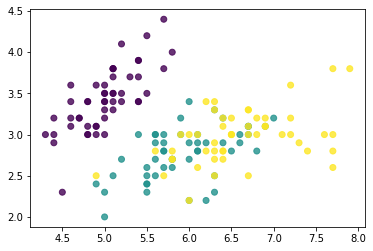

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Load data
iris = load_iris()
X=iris.data
y=iris.target

plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

#Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

#model
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
print('train score', model.score(X_train,y_train))
print('test score',model.score(X_test,y_test))


## Cross validation

/Users/houssem/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


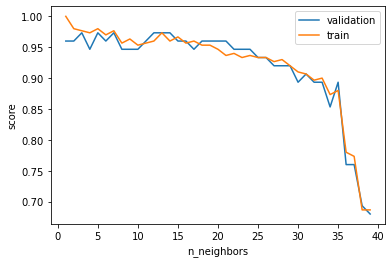

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

#cross_val_score(model, X_train,y_train,cv=5,scoring='accuracy').mean()
k=np.arange(1,40)
train_score, val_score = validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5)
plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

## Hyper parameters

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)


0.9866666666666667
{'metric': 'manhattan', 'n_neighbors': 4}


## Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,model.predict(X_test))

array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  5, 22]])

## Learning curve

[ 6 12 18 24 30 36 42 48 54 60]


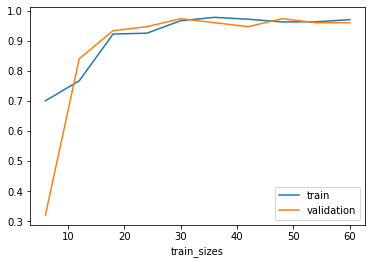

In [40]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1),label='train')
plt.plot(N, val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()